# Linear Regression: Time Series (Autoregressive) Model for Financial Data

### Autoregressive(p) model:

An autoregressive ($AR$) model predicts future behavior based on past behavior. It’s used for forecasting when there is some correlation between values in a time series and the values that precede and succeed them. An $AR(p)$ model is an autoregressive model where specific lagged values of $y_t$ are used as predictor variables. Lags are where results from one time period affect following periods.

<img src="https://otexts.com/fpp2/fpp_files/figure-html/arp-1.png" width="630" height="630"/>

For example, an $AR(1)$ would be a “first order autoregressive process.” The outcome variable in a first order $AR$ process at some point in time $t$ is related only to time periods that are one period apart (i.e. the value of the variable at $t - 1$). An $AR(p)$ model can be denoted as below.

$$
X_t = c + \sum_{i = 1}^{p}\displaystyle \varphi _{i} X_{t - i} + \epsilon_t
$$

Here, $\displaystyle \varphi _{1}$, ..., $\displaystyle \varphi _{p}$ are the parameters of the model, $c$ is a constant, and $\epsilon_t$ is white noise. 

### Linear regression model:
A linear regression model is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. It can be written as ${\displaystyle {y} = X{{\beta }}+{{\varepsilon }}}$, where ${y}$ is a vector of observed values $\displaystyle y_{i}$. $X$ is a matrix of row-vectors $\displaystyle {x} _{i}$. $\beta$ is a ${\displaystyle (p+1)}$ dimensional parameter vector, where ${\displaystyle \beta _{0}}$ is the intercept term. ${\displaystyle {{\varepsilon }}}$ is a vector of values ${\displaystyle \varepsilon _{i}}$.

In statistics, ordinary least squares (OLS) chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function of the independent variable. Using OLS, $\hat{{\beta}}$ is obtained through the formula $\hat{{\beta}}=\left({X}^{\top}{X}\right)^{-1} {X}^{\top}{y}$. Accordingly, $\hat{y} = X\hat{\beta}$.


# My Implementation on Litecoin Daily Closing Price

I extracted the Litecoin data from 1/1/2021 to 11/30/2021 from Yahoo Finance. Then the data will be fitted using an AR model.

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px

In [118]:
# Extract the Litecoin USD data from Yahoo Finance
data = web.DataReader('LTC-USD',
                      'yahoo',
                      start = '2021-01-01',
                      end = '2021-11-30')

Take a look at the data.

In [119]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,133.185760,123.328079,124.672768,126.230347,7326980728,126.230347
2021-01-02,140.372574,123.693619,126.272964,136.944885,10532067985,136.944885
2021-01-03,163.898636,135.739914,136.949402,160.190582,15385661271,160.190582
2021-01-04,173.027817,143.623962,160.271164,154.807327,13659785704,154.807327
2021-01-05,162.850189,147.400070,154.897552,158.594772,10192818976,158.594772


We are only interested in the closing price, so let's extract the closing price for January.

In [120]:
train_df = pd.DataFrame(data['Close'].iloc[:30])
train_df.head()

,Close
Date,
2021-01-01,126.230347
2021-01-02,136.944885
2021-01-03,160.190582
2021-01-04,154.807327
2021-01-05,158.594772


Plot the time series of the closing price and see what it looks like.

Text(0.5, 1.0, 'Litecoin Daily Price for 2021 January')

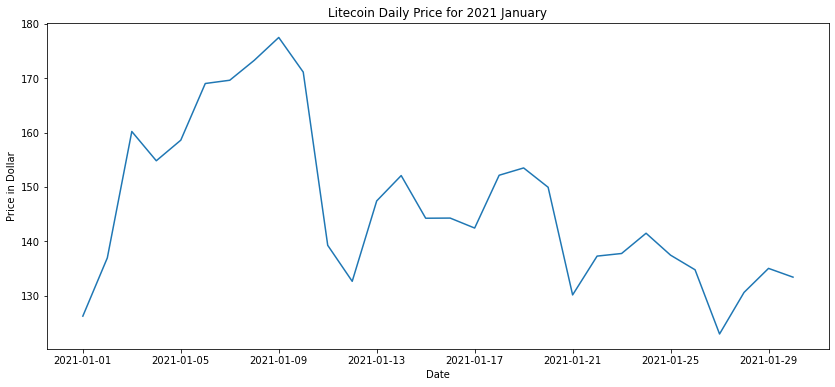

In [121]:
plt.figure(figsize = (14, 6))
plt.plot(train_df['Close'])
plt.xlabel('Date')
plt.ylabel('Price in Dollar')
plt.title('Litecoin Daily Price for 2021 January')

Then, plot all the variables of the complete data from 01/01/2021 to 11/30/2021 to find out some patterns.

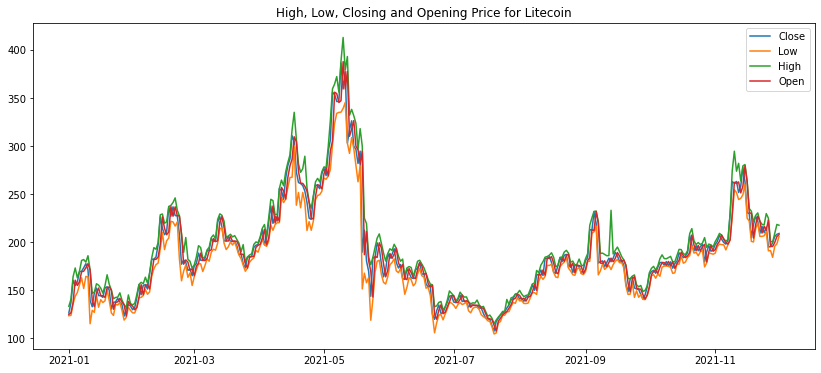

In [122]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'],label = "Close")
plt.plot(data['Low'],label = "Low")
plt.plot(data['High'],label = "High")
plt.plot(data['Open'],label = "Open")
plt.title('High, Low, Closing and Opening Price for Litecoin')
plt.legend()
plt.show()

Since we are interested in an AR model, let's generate a 1 step lagged data.

In [123]:
train_df['lag_1'] = train_df['Close'].shift(1)
train_df.head()

,Close,lag_1
Date,,
2021-01-01,126.230347,NaN
2021-01-02,136.944885,126.230347
2021-01-03,160.190582,136.944885
2021-01-04,154.807327,160.190582
2021-01-05,158.594772,154.807327


Create columns for lag 1 through lag 7.

In [124]:
for i in range(2, 8):
    train_df[f'lag_{i}'] = train_df['Close'].shift(i)
train_df.head(8)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-01,126.230347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-02,136.944885,126.230347,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-03,160.190582,136.944885,126.230347,NaN,NaN,NaN,NaN,NaN
2021-01-04,154.807327,160.190582,136.944885,126.230347,NaN,NaN,NaN,NaN
2021-01-05,158.594772,154.807327,160.190582,136.944885,126.230347,NaN,NaN,NaN
2021-01-06,169.016922,158.594772,154.807327,160.190582,136.944885,126.230347,NaN,NaN
2021-01-07,169.615952,169.016922,158.594772,154.807327,160.190582,136.944885,126.230347,NaN
2021-01-08,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582,136.944885,126.230347


Drop all the NaNs.

In [125]:
train_df = train_df.dropna()
train_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-08,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582,136.944885,126.230347
2021-01-09,177.483932,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582,136.944885
2021-01-10,171.114838,177.483932,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582
2021-01-11,139.252228,171.114838,177.483932,173.279877,169.615952,169.016922,158.594772,154.807327
2021-01-12,132.635910,139.252228,171.114838,177.483932,173.279877,169.615952,169.016922,158.594772


Now, we neet to obtain a list of weights for each lag. Equivalently, our outcome should regress on lag 1 through lag 7 via the weights.
$$\hat{{w}}=\left({X}^{\top}{X}\right)^{-1} {X}^{\top}{y}$$

In [126]:
cols = [f'lag_{i}' for i in range(1,8)]
X = train_df[cols].to_numpy()
y = train_df['Close'].to_numpy()
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y

Get the predicted value $\hat{y} = X\hat{w}$.

In [127]:
train_df['predictions'] = X @ w_hat
train_df['predictions'].head()

Date
2021-01-08    159.247515
2021-01-09    175.428462
2021-01-10    172.934176
2021-01-11    164.080648
2021-01-12    138.500884
Name: predictions, dtype: float64

Now, let's plot the real closing prices and the predicted closing prices.

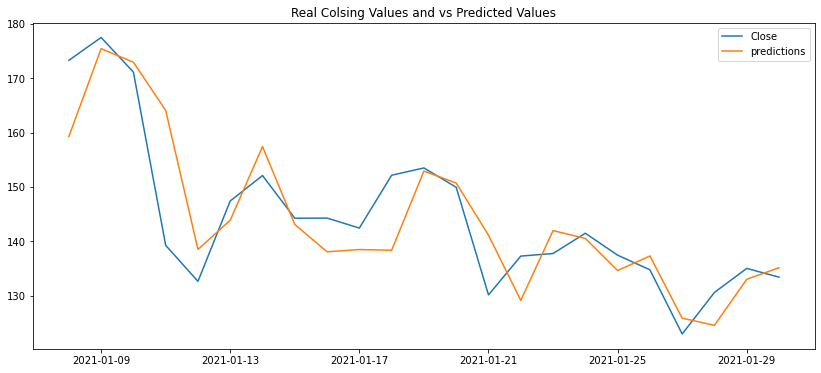

In [128]:
plt.figure(figsize = (14, 6))
plt.plot(train_df['Close'], label = "Close")
plt.plot(train_df['predictions'],label = "predictions")
plt.title('Real Colsing Values and vs Predicted Values')
plt.legend()
plt.show()

We see that the predicted values follows the trend of the real values, but the predicted values are a bit lagging behind the real ones.

### Adding bias:

Now, let's creat a column called "ones" and append it to the original X matrix.

In [129]:
train_df['ones'] = np.ones(len(train_df['Close']))
train_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predictions,ones
Date,,,,,,,,,,
2021-01-08,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582,136.944885,126.230347,159.247515,1.0
2021-01-09,177.483932,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582,136.944885,175.428462,1.0
2021-01-10,171.114838,177.483932,173.279877,169.615952,169.016922,158.594772,154.807327,160.190582,172.934176,1.0
2021-01-11,139.252228,171.114838,177.483932,173.279877,169.615952,169.016922,158.594772,154.807327,164.080648,1.0
2021-01-12,132.635910,139.252228,171.114838,177.483932,173.279877,169.615952,169.016922,158.594772,138.500884,1.0


In [130]:
cols = [f'lag_{i}' for i in range(1, 8)]
cols.append('ones')
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'ones']


Introduce "bias" and "predictions with bias". The $\hat{w}_{bias}$ is simply calculated using the original matrix but with a bias term.

In [131]:
X_bias = train_df[cols].to_numpy()
w_hat_bias = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
w_hat_bias

array([ 0.9930449 , -0.48439671,  0.08470262,  0.40532297, -0.39628245,
        0.46483259, -0.3867808 , 45.29322131])

In [132]:
train_df['predictions_with_bias'] = X_bias @ w_hat_bias

Then, let's plot the real closing prices, predictions, and predictions with bias.

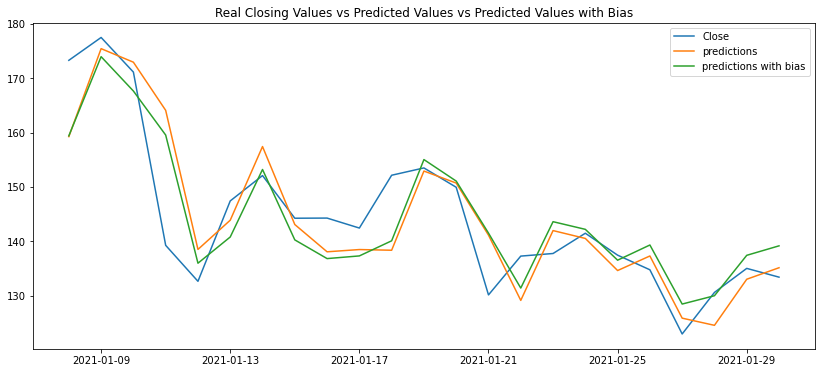

In [133]:
plt.figure(figsize=(14,6))
plt.plot(train_df['Close'],label="Close")
plt.plot(train_df['predictions'],label="predictions")
plt.plot(train_df['predictions_with_bias'],label="predictions with bias")
plt.title('Real Closing Values vs Predicted Values vs Predicted Values with Bias')
plt.legend()
plt.show()

We can tell from the plot that the "predictions with bias", simialar to "predictions", follows the general trend of the real values, but is still a bit lagging behind.

### Introduce RMSE for error analysis

In [136]:
y_hat1 = train_df['predictions'].to_numpy()
y_hat2 = train_df['predictions_with_bias'].to_numpy()

$
RMSE = \sqrt{\frac{\sum_{i = 1}^{n}(y_i - \hat{y}_i)^2}{n}}
$

In [137]:
def RMSE(labels, predictions):
    return np.sqrt((labels - predictions) @ (labels - predictions))

In [138]:
print(f'RMSE without bias = {RMSE(y, y_hat1)}')
print(f'RMSE with bias = {RMSE(y, y_hat2)}')

RMSE without bias = 37.62238420961228
RMSE with bias = 34.954639049956505


The RMSE with bias is slightly smaller than the RMSE without bias. The is due the bias we introduced.

### Test data

Now, let's create the test set by taking a subset of the most recent closing prices.

In [141]:
test_df = data['Close'].iloc[-31:]
test_df = pd.DataFrame(test_df)
test_df.head()

,Close
Date,
2021-11-01,197.554993
2021-11-02,200.724686
2021-11-03,207.110138
2021-11-04,202.967987
2021-11-05,199.537933


Redo the previous steps, create lagged data, and append the column "ones" for bias.

In [142]:
cols = []
for i in range(1, 8):
    test_df[f'lag_{i}'] = test_df['Close'].shift(i)
    cols.append(f'lag_{i}')

In [143]:
test_df = test_df.dropna()

In [144]:
test_df['ones'] = np.ones(len(test_df['Close']))
cols.append('ones')
test_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones
Date,,,,,,,,,
2021-11-08,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,200.724686,197.554993,1.0
2021-11-09,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,200.724686,1.0
2021-11-10,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,1.0
2021-11-11,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,1.0
2021-11-12,251.558365,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,1.0


Take a look at the previously computed $\hat{w}_{bias}$

In [146]:
w_hat_bias

array([ 0.9930449 , -0.48439671,  0.08470262,  0.40532297, -0.39628245,
        0.46483259, -0.3867808 , 45.29322131])

Get the predictions with bias $\hat{y}$.

In [147]:
X_bias = test_df[cols].to_numpy()
test_df['predictions_with_bias'] = X_bias @ w_hat_bias

In [148]:
y = test_df['Close'].to_numpy()
y_hat = test_df['predictions_with_bias'].to_numpy()
print(f'RMSE = {RMSE(y, y_hat)}')

RMSE = 150.53557426095307


The RMSE is 150.53557426095307.

Now, let's plot the predicted closing price for the test set.

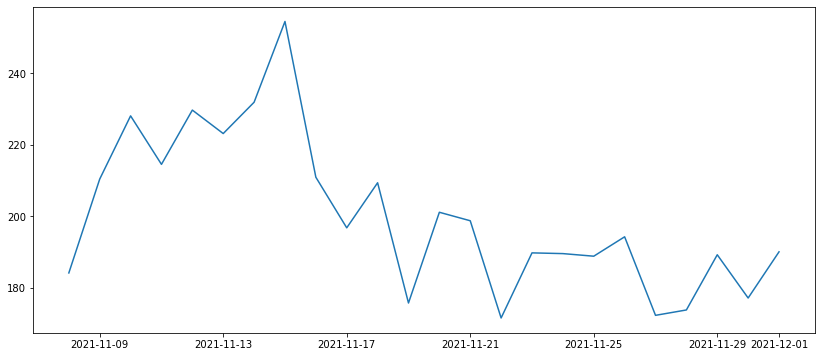

In [149]:
plt.figure(figsize=(14,6))
plt.plot(test_df['predictions_with_bias'])

In [150]:
test_df['lag_1'] = test_df['Close'].shift(1)
test_df['diff'] = test_df['Close'] - test_df['lag_1']
test_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones,predictions_with_bias,diff
Date,,,,,,,,,,,
2021-11-08,228.696198,NaN,197.866364,199.537933,202.967987,207.110138,200.724686,197.554993,1.0,184.081192,NaN
2021-11-09,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,200.724686,1.0,210.365365,34.210510
2021-11-10,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,1.0,228.072289,-1.643738
2021-11-11,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,1.0,214.491791,1.823730
2021-11-12,251.558365,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,1.0,229.687816,-11.528336


In [151]:
diff_df = test_df.dropna()
diff_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones,predictions_with_bias,diff
Date,,,,,,,,,,,
2021-11-09,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,200.724686,1.0,210.365365,34.210510
2021-11-10,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,207.110138,1.0,228.072289,-1.643738
2021-11-11,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,202.967987,1.0,214.491791,1.823730
2021-11-12,251.558365,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,199.537933,1.0,229.687816,-11.528336
2021-11-13,258.093201,251.558365,263.086700,261.262970,262.906708,228.696198,202.051315,197.866364,1.0,223.116263,6.534836


Plot the real closing prices and predicted prices.

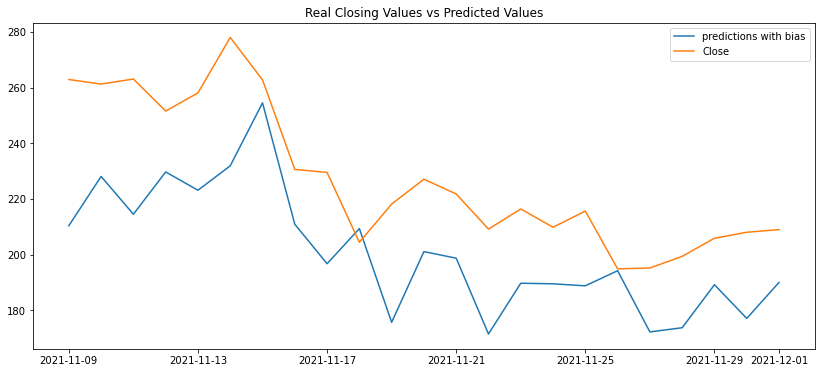

In [152]:
plt.figure(figsize = (14,6))
plt.plot(diff_df['predictions_with_bias'],label = "predictions with bias")
plt.plot(diff_df['Close'],label = "Close")
plt.title('Real Closing Values vs Predicted Values')
plt.legend()
plt.show()

From the plot we see that except for the general trend, the predicted values do not conform with the real values well. The $\hat{w}_{bias}$ is probably not that suitable for the most recent closing prices.

In [154]:
y_hat1 = diff_df['Close'].to_numpy()
y_hat2 = diff_df['predictions_with_bias'].to_numpy()

def RMSE(labels,predictions):
    return np.sqrt((labels - predictions)@(labels-predictions))

print(f'In-Sample RMSE = {RMSE(y_hat1, y_hat2)}\n')

In-Sample RMSE = 143.77225185918735



The in-sample RMSE is 143.77225185918735.

Finally, let's plot the differences between the closing prices and lag-1 prices.

Text(0.5, 1.0, 'The difference between close and lag 1')

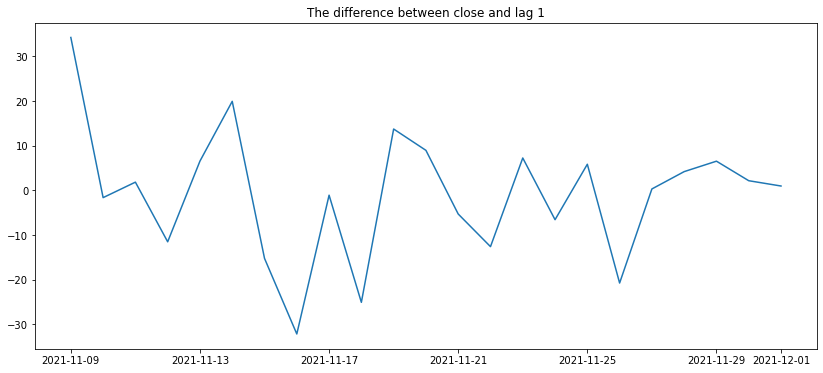

In [155]:
plt.figure(figsize=(14,6))
plt.plot(diff_df['diff'])
plt.title("The difference between close and lag 1")

### Some considerations on log of the closing price

Let's again plot the closing price of the complete data. The price varies from 100 to 400.

Text(0.5, 1.0, 'Litecoin Daily Price for 2021')

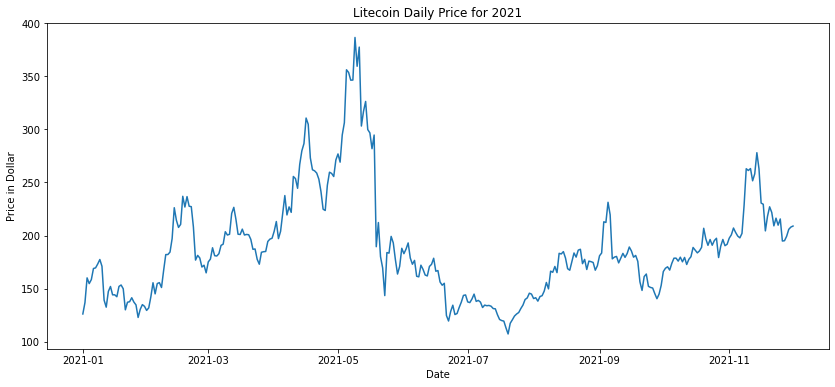

In [161]:
plt.figure(figsize = (14, 6))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Price in Dollar')
plt.title('Litecoin Daily Price for 2021')

Due to the large variation, we introduce log of the closing price, which should effectively stablize the price.

Text(0.5, 1.0, 'Litecoin Daily Price for 2021')

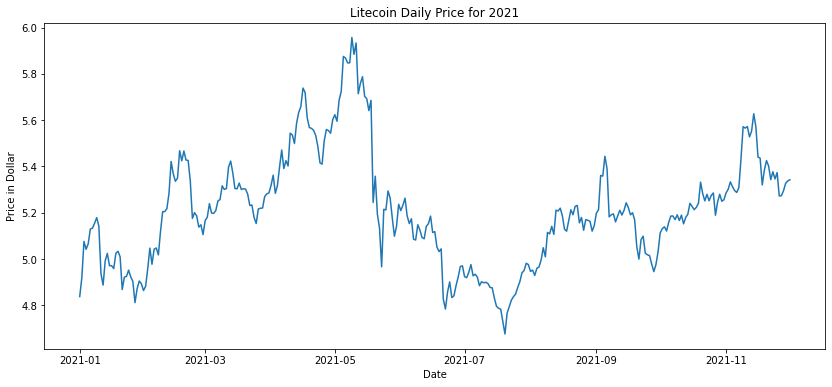

In [162]:
data['log_Close'] = np.log(data['Close'])
plt.figure(figsize = (14, 6))
plt.plot(data['log_Close'])
plt.xlabel('Date')
plt.ylabel('Price in Dollar')
plt.title('Litecoin Daily Price for 2021')

The variation decreases a lot, so for further studies, we might need to fit the model using the log of the closing price.

# References

Autoregressive model: definition & the AR process. Statistics How To. https://www.statisticshowto.com/

Autoregressive model. Wikipedia. https://en.wikipedia.org/wiki/Autoregressive_model

Linear regression. Wikipedia. https://en.wikipedia.org/wiki/Linear_regression